In [1]:
# global packages
import os
import csv
import cv2
import pandas as pd
from tqdm import tqdm
# local packages
from imgparse import image_list
from watershed import segmentCells
from blob_detect import detectBlobs, count
from display import show_blobs, show_cells, show_image # Jupyter

In [2]:
class Fisher:

    def __init__(self, file):
        self.file = file
        self.path = os.path.split(self.file)
        self.index = self.file.split('filter0')
        self.channel1 = ('filter4').join(self.index)
        self.channel2 = ('filter1').join(self.index)
        self.fieldnames = [
            'image',
            'treatment',
            'stain',
            'cell',
            'area',
            'channel1',
            'channel2']
 
    def _count(self):
        return len(self.contours)

    def _features(self):
        self.data = count(
            self.path[1], 
            self.fieldnames, 
            self.contours, 
            self.hierarchy, 
            [self.Ch1, self.Ch2])
        return self.data

    def _table(self):
        return pd.DataFrame(self._features())

    def _write(self, resultsfile):
        self.resultsfile = resultsfile
        if os.path.exists(self.resultsfile):
            with open(self.resultsfile, 'a+', newline='') as output:
                write = csv.DictWriter(output, self.fieldnames)
                write.writerows(self._features())
        else:
            with open(self.resultsfile, 'w', newline='') as output:
                write = csv.DictWriter(output, self.fieldnames)
                write.writeheader()
                write.writerows(self._features())
        output.close()
    
    def _ch0(self):
        show_cells(self.file, self.contours, self.hierarchy)
        # include save option

    def _ch1(self):
        show_blobs(self.channel1, self.Ch1)
    
    def _ch2(self):
        show_blobs(self.channel2, self.Ch2)

    def _run(self):
        self.contours, self.hierarchy = segmentCells(self.file, 99)
        self.Ch1 = detectBlobs(self.channel1, 0.01)
        self.Ch2 = detectBlobs(self.channel2, 0.01)

In [13]:
image_directory = '/Users/dmorales/Documents/analysis/2021_04_19_smFISH_best/equalize/'
images = image_list(image_directory, 'filter3')

smfish = Fisher(images[75])
# smfish._run()

149 number of image sets found.


In [31]:
x = detectBlobs(smfish.channel2, 0.1)

/Users/dmorales/opt/anaconda3/envs/india/lib/python3.8/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/Users/dmorales/opt/anaconda3/envs/india/lib/python3.8/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/Users/dmorales/opt/anaconda3/envs/india/lib/python3.8/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/Users/dmorales/opt/anaconda3/envs/india/lib/python3.8/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


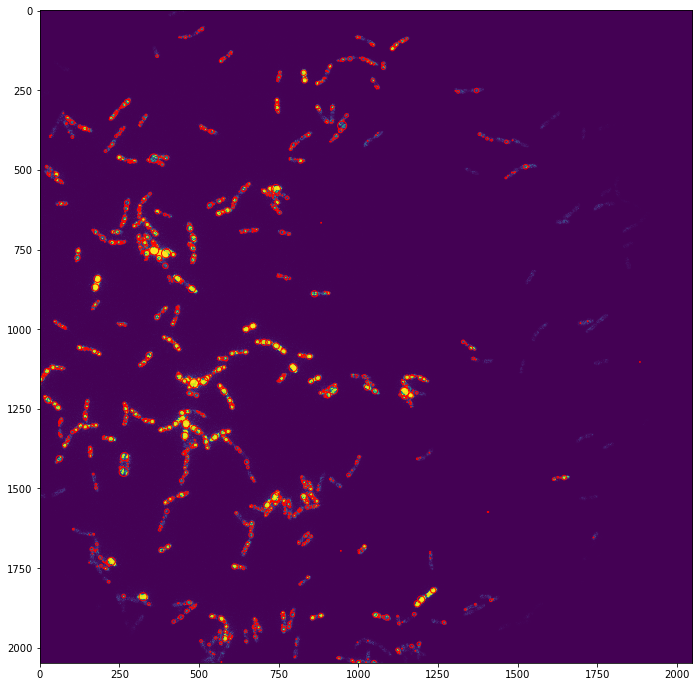

In [32]:
show_blobs(smfish.channel2,x)

In [43]:
z,y = segmentCells(smfish.file,69)

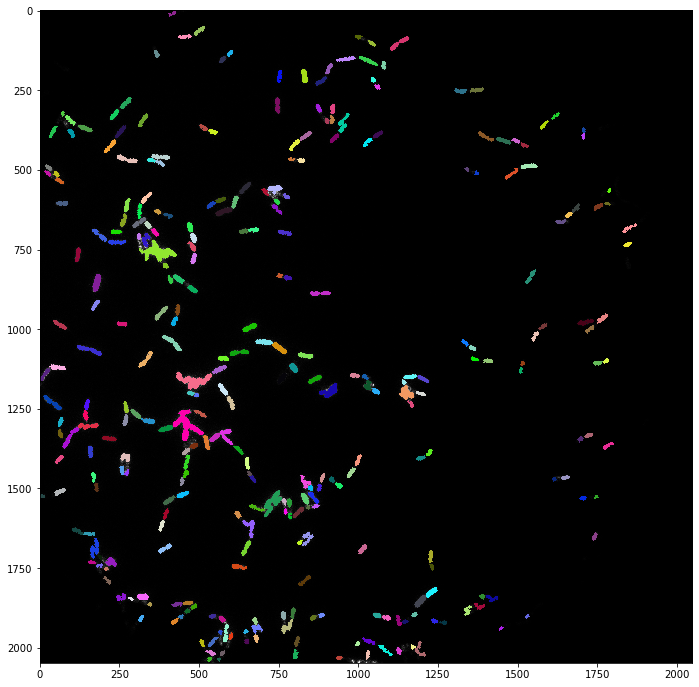

In [44]:
show_cells(smfish.file,z,y)